# Imports

In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split # for train test split

In [2]:
#estimators
from sklearn.ensemble import RandomForestClassifier # for random forest model
from sklearn import tree

In [3]:
#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [97]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# Prepare Data

In [5]:
# Load Data
survey = pd.read_csv('CompleteResponses.csv', header =0)

In [6]:
survey.describe(include ='all')

,salary,age,elevel,car,zipcode,credit,brand
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [7]:
cols_allX = ['salary','age','elevel','car','zipcode','credit']

# Functions

In [86]:
# purpose: prevent assignment mistakes

def loadData() :
    
# make elevel ordinal
    cat_dtype = pd.api.types.CategoricalDtype(
        categories=[0,1,2,3,4], ordered=True)

    survey['elevel'] = survey.elevel.astype(cat_dtype)
    survey['car'] = survey.car.astype('category')
    survey['zipcode'] = survey.zipcode.astype('category')
    survey['brand'] = survey.brand.astype('category')
    
    print(survey.describe(include='all'))
    
    return survey

In [9]:
# train, test split function
## cols = feature columns, list of column names
def sD(cols) :

    X = survey[cols]
    y = survey['brand']

    print(X.columns)

    print(y.head())

    sD.X_train, sD.X_test, sD.y_train, sD.y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    print('The number of observations in the Y training set are:',str(len(sD.y_train.index)))
    print('The number of observations in the X training set are:',str(len(sD.X_train.index)))
    print('The number of observations in the X testing set are:',str(len(sD.X_test.index)))
    print('The number of observations in the y testing set are:',str(len(sD.y_test.index)))
    print(len(sD.X_test)/(len(sD.X_test)+len(sD.X_train)))
    print(len(sD.y_test)/(len(sD.y_test)+len(sD.y_train)))
    
    #return sD.X_train, sD.X_test, sD.y_train, sD.y_test

In [10]:
# function to create a pandas dataframe, with prediction results and actual results

# modelInitial_string is the initial of the model. Ex: 'rf' is for random forest
# predictions is the predictions object from the model. Ex: predictions_rf is created when we run the .predict() on the random forest model
# y_test is the default rows (test data), created during train test split step

def predDF(modelInitial_string, predictions, y_test ) :
    predColumnName = 'predictions_' + modelInitial_string
    redColNam = 'results_' + modelInitial_string
    predictions_df = pd.DataFrame(predictions)
    predictions_df.columns = [predColumnName]
    predictions_df.reset_index(drop=True, inplace=True)
    ytest_df = pd.DataFrame(y_test)
    ytest_df.columns = ['actualResults']
    ytest_df.reset_index(drop=True, inplace=True)
    res = [ytest_df,predictions_df]
    redColNam = pd.concat(res,sort=False, axis = 1)
    print (redColNam.columns)
    return redColNam

In [11]:
# function for my metrics

#modelName : name of algorithm as a string, can be initial or full name
#y_test : test set of target variable
# modelPredictions : model predictions, output of .predict()

def myMetrics(modelName_str, y_test, modelPredictions) :
    f1Score = f1_score(y_test, modelPredictions, average="binary")
    recallScore = recall_score(y_test, modelPredictions, average="binary")
    precision = precision_score(y_test, modelPredictions, average="binary")
    accuracyScore = accuracy_score(y_test, modelPredictions)
    kappaScore = cohen_kappa_score(y_test, modelPredictions)
        
    print(f"F1score for {modelName} model: {f1Score:.5f} ")
    print(f"Accuracy for {modelName} model: {accuracyScore:.5f} ")
    print(f"Kappa for {modelName} model: {kappaScore:.5f} ") 
    print(f"Precision for {modelName} model: {precision:.5f} ")
    print(f"Recall : The {modelName} model correctly identifed all customer who defaulted {recallScore:.5f} of the time.")

# Out-of-Box Model

I will try C5.0 and Random Forest

In [ ]:
survey = loadData()
sD(cols_allX)

## Basic Decision Tree

In [14]:
# Basic Decsion Tree Model 
modelName = 'tree'
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(sD.X_train, sD.y_train)
predictions_tree= model.predict(sD.X_test)
results_tree = predDF('rf',predictions_tree, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_tree)

Index(['actualResults', 'predictions_rf'], dtype='object')
F1score for tree model: 0.91620 
Accuracy for tree model: 0.89778 
Kappa for tree model: 0.78518 
Precision for tree model: 0.92016 
Recall : The tree model correctly identifed all customer who defaulted 0.91227 of the time.


## Random Forest

In [17]:
# Random Forest Model 
modelName = 'rf'
model = RandomForestClassifier(random_state=0)
model.fit(sD.X_train, sD.y_train)
predictions_rf= model.predict(sD.X_test)
results_rf = predDF('rf',predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf'], dtype='object')
F1score for rf model: 0.93895 
Accuracy for rf model: 0.92566 
Kappa for rf model: 0.84392 
Precision for rf model: 0.94459 
Recall : The rf model correctly identifed all customer who defaulted 0.93338 of the time.


## Support Vector Machine

In [18]:
# SVM Model 
from sklearn import svm
modelName = 'svm'
model = svm.SVC(random_state=0)
model.fit(sD.X_train, sD.y_train)
predictions_svm= model.predict(sD.X_test)
results_svm = predDF('svm',predictions_svm, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_svm)

Index(['actualResults', 'predictions_svm'], dtype='object')
F1score for svm model: 0.75971 
Accuracy for svm model: 0.61253 
Kappa for svm model: 0.00000 
Precision for svm model: 0.61253 
Recall : The svm model correctly identifed all customer who defaulted 1.00000 of the time.


# Improve Random Forest Model

In [20]:
# start with clean Data
survey = loadData()
#sD(cols_allX)

               salary          age  elevel     car  zipcode         credit  \
count     9898.000000  9898.000000  9898.0  9898.0   9898.0    9898.000000   
unique            NaN          NaN     5.0    20.0      9.0            NaN   
top               NaN          NaN     0.0    15.0      6.0            NaN   
freq              NaN          NaN  2052.0   542.0   1155.0            NaN   
mean     84870.862257    49.778642     NaN     NaN      NaN  249175.966620   
std      37712.340836    17.596685     NaN     NaN      NaN  145211.572531   
min      20000.000000    20.000000     NaN     NaN      NaN       0.000000   
25%      52082.106040    35.000000     NaN     NaN      NaN  120806.813900   
50%      84949.735155    50.000000     NaN     NaN      NaN  250607.146100   
75%     117162.043375    65.000000     NaN     NaN      NaN  374639.701800   
max     150000.000000    80.000000     NaN     NaN      NaN  500000.000000   

         brand  
count   9898.0  
unique     2.0  
top        1

## Discretize by Binning

### Age

In [40]:
# Bin Age into Categorical Variable
cut_labels_age = [20, 30, 40, 50,60,70]
cut_bins = [19, 30, 40, 50, 60,70,81]
survey['age_binned'] = pd.cut(survey['age'], bins=cut_bins, labels=cut_labels_age)
survey.age_binned.value_counts()
#survey = survey.drop(['age'],axis=1)
survey['age_binned'] = survey.age_binned.astype('category')

In [41]:
survey.age_binned.value_counts()

20    1799
30    1637
50    1630
40    1628
60    1605
70    1599
Name: age_binned, dtype: int64

In [46]:
# Verify
survey.describe(include='all')

,salary,age,elevel,car,zipcode,credit,brand,age_binned
count,9898.000000,9898.000000,9898.0,9898.0,9898.0,9898.000000,9898.0,9898.0
unique,NaN,NaN,5.0,20.0,9.0,NaN,2.0,6.0
top,NaN,NaN,0.0,15.0,6.0,NaN,1.0,20.0
freq,NaN,NaN,2052.0,542.0,1155.0,NaN,6154.0,1799.0
mean,84870.862257,49.778642,NaN,NaN,NaN,249175.966620,NaN,NaN
std,37712.340836,17.596685,NaN,NaN,NaN,145211.572531,NaN,NaN
min,20000.000000,20.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,52082.106040,35.000000,NaN,NaN,NaN,120806.813900,NaN,NaN
50%,84949.735155,50.000000,NaN,NaN,NaN,250607.146100,NaN,NaN
75%,117162.043375,65.000000,NaN,NaN,NaN,374639.701800,NaN,NaN


In [47]:
cols = ['salary','age_binned','elevel','car','zipcode','credit']
sD(cols)

Index(['salary', 'age_binned', 'elevel', 'car', 'zipcode', 'credit'], dtype='object')
0    0
1    1
2    0
3    1
4    0
Name: brand, dtype: category
Categories (2, int64): [0, 1]
The number of observations in the Y training set are: 7423
The number of observations in the X training set are: 7423
The number of observations in the X testing set are: 2475
The number of observations in the y testing set are: 2475
0.2500505152556072
0.2500505152556072


In [48]:
# are there NaNs?
print((survey[survey.columns] == 0).sum())
print(survey.isnull().sum())

salary           0
age              0
elevel        2052
car              0
zipcode       1085
credit         119
brand         3744
age_binned       0
dtype: int64
salary        0
age           0
elevel        0
car           0
zipcode       0
credit        0
brand         0
age_binned    0
dtype: int64


In [51]:
# Random Forest Model 
modelName = 'rf'
model = RandomForestClassifier(random_state=0)
model.fit(sD.X_train, sD.y_train)
predictions_rf= model.predict(sD.X_test)
results_rf = predDF('rf',predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf'], dtype='object')
F1score for rf model: 0.93355 
Accuracy for rf model: 0.91879 
Kappa for rf model: 0.82914 
Precision for rf model: 0.93572 
Recall : The rf model correctly identifed all customer who defaulted 0.93140 of the time.


### Salary

In [55]:
survey['salary_binned'] = pd.DataFrame(pd.qcut(survey['salary'], q=60, precision= 0,labels=False))

In [56]:
# Verify
survey.describe(include='all')

,salary,age,elevel,car,zipcode,credit,brand,age_binned,salary_binned
count,9898.000000,9898.000000,9898.0,9898.0,9898.0,9898.000000,9898.0,9898.0,9898.000000
unique,NaN,NaN,5.0,20.0,9.0,NaN,2.0,6.0,NaN
top,NaN,NaN,0.0,15.0,6.0,NaN,1.0,20.0,NaN
freq,NaN,NaN,2052.0,542.0,1155.0,NaN,6154.0,1799.0,NaN
mean,84870.862257,49.778642,NaN,NaN,NaN,249175.966620,NaN,NaN,29.499899
std,37712.340836,17.596685,NaN,NaN,NaN,145211.572531,NaN,NaN,17.320142
min,20000.000000,20.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,52082.106040,35.000000,NaN,NaN,NaN,120806.813900,NaN,NaN,14.250000
50%,84949.735155,50.000000,NaN,NaN,NaN,250607.146100,NaN,NaN,29.500000
75%,117162.043375,65.000000,NaN,NaN,NaN,374639.701800,NaN,NaN,44.750000


In [57]:
survey.salary_binned.value_counts()

55    165
57    165
27    165
19    165
11    165
3     165
58    165
50    165
42    165
34    165
26    165
18    165
10    165
2     165
49    165
47    165
41    165
33    165
25    165
17    165
9     165
1     165
56    165
48    165
32    165
24    165
16    165
8     165
35    165
43    165
51    165
59    165
39    165
31    165
23    165
15    165
7     165
54    165
46    165
38    165
30    165
22    165
14    165
6     165
53    165
45    165
37    165
29    165
21    165
13    165
5     165
52    165
44    165
36    165
28    165
12    165
4     165
0     165
40    164
20    164
Name: salary_binned, dtype: int64

In [58]:
cols = ['salary_binned','age','elevel','car','zipcode','credit']
sD(cols)

Index(['salary_binned', 'age', 'elevel', 'car', 'zipcode', 'credit'], dtype='object')
0    0
1    1
2    0
3    1
4    0
Name: brand, dtype: category
Categories (2, int64): [0, 1]
The number of observations in the Y training set are: 7423
The number of observations in the X training set are: 7423
The number of observations in the X testing set are: 2475
The number of observations in the y testing set are: 2475
0.2500505152556072
0.2500505152556072


In [59]:
# Random Forest Model 
modelName = 'rf'
model = RandomForestClassifier(random_state=0)
model.fit(sD.X_train, sD.y_train)
predictions_rf= model.predict(sD.X_test)
results_rf = predDF('rf',predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf'], dtype='object')
F1score for rf model: 0.93754 
Accuracy for rf model: 0.92404 
Kappa for rf model: 0.84065 
Precision for rf model: 0.94444 
Recall : The rf model correctly identifed all customer who defaulted 0.93074 of the time.


### Credit
Binning Age and Salary did not improve the model. I will not bother binning credit. 

## Class Imbalance

In [60]:
survey = loadData()
sD(cols_allX)

               salary          age  elevel     car  zipcode         credit  \
count     9898.000000  9898.000000  9898.0  9898.0   9898.0    9898.000000   
unique            NaN          NaN     5.0    20.0      9.0            NaN   
top               NaN          NaN     0.0    15.0      6.0            NaN   
freq              NaN          NaN  2052.0   542.0   1155.0            NaN   
mean     84870.862257    49.778642     NaN     NaN      NaN  249175.966620   
std      37712.340836    17.596685     NaN     NaN      NaN  145211.572531   
min      20000.000000    20.000000     NaN     NaN      NaN       0.000000   
25%      52082.106040    35.000000     NaN     NaN      NaN  120806.813900   
50%      84949.735155    50.000000     NaN     NaN      NaN  250607.146100   
75%     117162.043375    65.000000     NaN     NaN      NaN  374639.701800   
max     150000.000000    80.000000     NaN     NaN      NaN  500000.000000   

         brand  age_binned  salary_binned  
count   9898.0     

In [61]:
sD.y_train.value_counts()

1    4638
0    2785
Name: brand, dtype: int64

In [62]:
# create the object.
over_sampler = RandomOverSampler()
# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_sample(sD.X_train, sD.y_train)

In [63]:
y_train_over.value_counts()

1    4638
0    4638
Name: brand, dtype: int64

In [64]:
under_sampler = RandomUnderSampler()

# fit the object to the training data.
x_train_under, y_train_under = under_sampler.fit_sample(sD.X_train, sD.y_train)

In [65]:
y_train_under.value_counts()

1    2785
0    2785
Name: brand, dtype: int64

In [66]:
# Random Forest Model - Oversampling
modelName = 'rf_randOver'
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train_over, y_train_over) # train_over
predictions_rf= rf_model.predict(sD.X_test)
results_rf = predDF(modelName,predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_randOver'], dtype='object')
F1score for rf_randOver model: 0.93750 
Accuracy for rf_randOver model: 0.92485 
Kappa for rf_randOver model: 0.84336 
Precision for rf_randOver model: 0.95548 
Recall : The rf_randOver model correctly identifed all customer who defaulted 0.92018 of the time.


In [67]:
# Random Forest Model - Undersampling
modelName = 'rf_randUnder'
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train_under, y_train_under) # train_under
predictions_rf= rf_model.predict(sD.X_test)
results_rf = predDF(modelName,predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf_randUnder'], dtype='object')
F1score for rf_randUnder model: 0.92825 
Accuracy for rf_randUnder model: 0.91556 
Kappa for rf_randUnder model: 0.82607 
Precision for rf_randUnder model: 0.96779 
Recall : The rf_randUnder model correctly identifed all customer who defaulted 0.89182 of the time.


## Parameter Tuning
The out-of-box random forest performed the best. I will tune that model.


In [68]:
survey = loadData()
sD(cols_allX)

               salary          age  elevel     car  zipcode         credit  \
count     9898.000000  9898.000000  9898.0  9898.0   9898.0    9898.000000   
unique            NaN          NaN     5.0    20.0      9.0            NaN   
top               NaN          NaN     0.0    15.0      6.0            NaN   
freq              NaN          NaN  2052.0   542.0   1155.0            NaN   
mean     84870.862257    49.778642     NaN     NaN      NaN  249175.966620   
std      37712.340836    17.596685     NaN     NaN      NaN  145211.572531   
min      20000.000000    20.000000     NaN     NaN      NaN       0.000000   
25%      52082.106040    35.000000     NaN     NaN      NaN  120806.813900   
50%      84949.735155    50.000000     NaN     NaN      NaN  250607.146100   
75%     117162.043375    65.000000     NaN     NaN      NaN  374639.701800   
max     150000.000000    80.000000     NaN     NaN      NaN  500000.000000   

         brand  age_binned  salary_binned  
count   9898.0     

In [71]:
# Random Forest Model 
modelName = 'rf'
model_rf_beforeTuning = RandomForestClassifier(random_state=0)
model_rf_beforeTuning.fit(sD.X_train, sD.y_train)
predictions_rf= model_rf_beforeTuning.predict(sD.X_test)
results_rf = predDF('rf',predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)

Index(['actualResults', 'predictions_rf'], dtype='object')
F1score for rf model: 0.93895 
Accuracy for rf model: 0.92566 
Kappa for rf model: 0.84392 
Precision for rf model: 0.94459 
Recall : The rf model correctly identifed all customer who defaulted 0.93338 of the time.


In [70]:
#Random Search with Cross Validation

# Number of trees (estimators) in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20,25,30,35,40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = model_rf_beforeTuning


# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomSearch = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', # takes forever to run
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_randomSearch.fit(sD.X_train, sD.y_train);


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished


In [76]:
rf_randomSearch.best_params_

{'n_estimators': 1000,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

Best Parameters: 

{'n_estimators': 1000,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}
 
 Pasted this here since randomizedSearch takes quite a bit to run

In [78]:
# Random Forest Model - After Tuning
modelName = 'rf_tuned'
rf_tuned = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 30,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth=110,
 bootstrap= True, random_state=0)

rf_tuned.fit(sD.X_train, sD.y_train) 
predictions_rf= rf_tuned.predict(sD.X_test)
results_rf = predDF(modelName,predictions_rf, sD.y_test )
myMetrics(modelName, sD.y_test, predictions_rf)


Index(['actualResults', 'predictions_rf_tuned'], dtype='object')
F1score for rf_tuned model: 0.94156 
Accuracy for rf_tuned model: 0.92848 
Kappa for rf_tuned model: 0.84943 
Precision for rf_tuned model: 0.94250 
Recall : The rf_tuned model correctly identifed all customer who defaulted 0.94063 of the time.


# K-Fold Cross Validation Train/Test Split
now using best parameters:

In [87]:
survey = loadData()

               salary          age  elevel     car  zipcode         credit  \
count     9898.000000  9898.000000  9898.0  9898.0   9898.0    9898.000000   
unique            NaN          NaN     5.0    20.0      9.0            NaN   
top               NaN          NaN     0.0    15.0      6.0            NaN   
freq              NaN          NaN  2052.0   542.0   1155.0            NaN   
mean     84870.862257    49.778642     NaN     NaN      NaN  249175.966620   
std      37712.340836    17.596685     NaN     NaN      NaN  145211.572531   
min      20000.000000    20.000000     NaN     NaN      NaN       0.000000   
25%      52082.106040    35.000000     NaN     NaN      NaN  120806.813900   
50%      84949.735155    50.000000     NaN     NaN      NaN  250607.146100   
75%     117162.043375    65.000000     NaN     NaN      NaN  374639.701800   
max     150000.000000    80.000000     NaN     NaN      NaN  500000.000000   

         brand  age_binned  salary_binned  
count   9898.0     

In [88]:
X = survey[cols_allX]
y = survey['brand']

In [95]:
# KFold Cross Validation approach
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
f1Score = []
accuracyScore = []
kappaScore = []
precisionScore = []
recallScore = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = rf_tuned.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracyScore.append(accuracy_score(y_test, model.predict(X_test), normalize=True))
    accuracy_mean = sum(accuracyScore)/10
    kappaScore.append(cohen_kappa_score(y_test, model.predict(X_test)))
    kappa_mean = sum(kappaScore)/10
    f1Score.append(f1_score(y_test, model.predict(X_test), average="binary"))
    f1_mean = sum(f1Score)/10
    precisionScore.append(precision_score(y_test, model.predict(X_test), average="binary"))
    precision_mean = sum(precisionScore)/10
    recallScore.append(recall_score(y_test, model.predict(X_test), average="binary"))
    recall_mean = sum(recallScore)/10
 
# Print the accuracy    
print(accuracy_mean)
print(kappa_mean)
print(f1_mean)
print(precision_mean)
print(recall_mean)

0.9225110559589831
0.8355590946660328
0.9374161516274835
0.9404288434951067
0.9344811825548112


# Stratified KFold Cross Validation Train/Test Split
We could try stratified sampling for 

In [99]:
# StratifiedKFold Cross Validation approach
kf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)
kf.split(X,y)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
f1Score = []
accuracyScore = []
kappaScore = []
precisionScore = []
recallScore = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X,y):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = rf_tuned.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracyScore.append(accuracy_score(y_test, model.predict(X_test), normalize=True))
    accuracy_mean = sum(accuracyScore)/10
    kappaScore.append(cohen_kappa_score(y_test, model.predict(X_test)))
    kappa_mean = sum(kappaScore)/10
    f1Score.append(f1_score(y_test, model.predict(X_test), average="binary"))
    f1_mean = sum(f1Score)/10
    precisionScore.append(precision_score(y_test, model.predict(X_test), average="binary"))
    precision_mean = sum(precisionScore)/10
    recallScore.append(recall_score(y_test, model.predict(X_test), average="binary"))
    recall_mean = sum(recallScore)/10
 
# Print the accuracy    
print(accuracy_mean)
print(kappa_mean)
print(f1_mean)
print(precision_mean)
print(recall_mean)

0.9231156866950597
0.8370730226845904
0.937850689087617
0.9426179699150271
0.9332132298595714


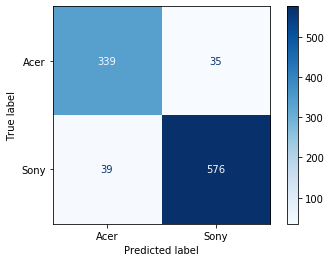

In [108]:
# Plot Confusion Matrix
disp = plot_confusion_matrix(rf_tuned, X_test, y_test,
                                 display_labels=["Acer","Sony"],
                                 cmap=plt.cm.Blues,
                                 normalize=None, values_format='.0f')

#disp.ax_.set_title("Predictions after Removing Outliers")

# Variable Importance

In [100]:
rf_tuned.feature_importances_

array([0.62914892, 0.27779141, 0.0098607 , 0.02103707, 0.01494323,
       0.04721868])

Feature ranking:
1. feature 0 (salary) (0.629149)
2. feature 1 (age) (0.277791)
3. feature 5 (credit) (0.047219)
4. feature 3 (car) (0.021037)
5. feature 4 (zipcode) (0.014943)
6. feature 2 (elevel) (0.009861)


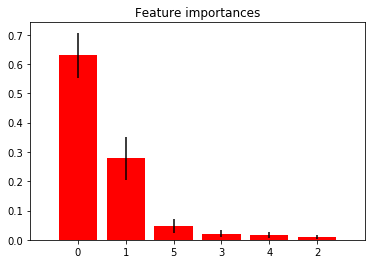

Index(['salary', 'age', 'elevel', 'car', 'zipcode', 'credit'], dtype='object')


In [104]:
importances = rf_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()
from pprint import pprint
pprint(X_train.columns)

# Make Predictions

In [109]:
# Load Data. Predict brand preference of these customers
incompleteSurvey = pd.read_csv('surveyIncomplete.csv', header =0)

In [110]:
incompleteSurvey.describe(include ='all')

,salary,age,elevel,car,zipcode,credit,brand
count,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000,5000.000000
mean,85793.810549,49.935800,2.00920,10.60460,4.03760,249546.214730,0.012600
std,37800.008573,17.665925,1.41206,5.80467,2.56747,145859.260007,0.111551
min,20000.000000,20.000000,0.00000,1.00000,0.00000,0.000000,0.000000
25%,52589.960977,35.000000,1.00000,6.00000,2.00000,122310.705600,0.000000
50%,86220.717695,50.000000,2.00000,11.00000,4.00000,250973.693550,0.000000
75%,118535.161750,65.000000,3.00000,16.00000,6.00000,375652.704825,0.000000
max,150000.000000,80.000000,4.00000,20.00000,8.00000,500000.000000,1.000000


In [111]:
incompleteSurvey.info

<bound method DataFrame.info of             salary  age  elevel  car  zipcode        credit  brand
0     150000.00000   76       1    3        3  377980.10160      1
1      82523.83897   51       1    8        3  141657.60660      0
2     115646.63620   34       0   10        2  360980.35850      1
3     141443.39330   22       3   18        2  282736.31910      1
4     149211.27030   56       0    5        3  215667.28960      1
...            ...  ...     ...  ...      ...           ...    ...
4995   83891.55966   52       2   14        5   28685.22963      0
4996  125979.28910   71       0   12        7  276614.82930      0
4997   74064.71053   24       2    2        2  202279.57880      0
4998  106485.56710   46       3   16        0  381242.08810      0
4999   50333.57979   70       1    5        5  224871.17020      0

[5000 rows x 7 columns]>

In [113]:
# Convert categorical variables that are inputted as numeric into categorical types
# make elevel ordinal
cat_dtype = pd.api.types.CategoricalDtype(
    categories=[0,1,2,3,4], ordered=True)

incompleteSurvey['elevel'] = incompleteSurvey.elevel.astype(cat_dtype)
incompleteSurvey['car'] = incompleteSurvey.car.astype('category')
incompleteSurvey['zipcode'] = incompleteSurvey.zipcode.astype('category')
incompleteSurvey['brand'] = incompleteSurvey.brand.astype('category')

In [114]:
X_incomplete = incompleteSurvey.iloc[:,0:6]
y_incomplete = incompleteSurvey['brand']

In [115]:
X_incomplete.columns

Index(['salary', 'age', 'elevel', 'car', 'zipcode', 'credit'], dtype='object')

In [116]:
y_incomplete.head()

0    1
1    0
2    1
3    1
4    1
Name: brand, dtype: category
Categories (2, int64): [0, 1]

In [117]:
predictions_incomplete = rf_tuned.predict(X_incomplete)

In [118]:
print(predictions_incomplete.shape)

(5000,)


In [119]:
# Summarize brand preferences
(unique, counts) = np.unique(predictions_incomplete, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0 1905]
 [   1 3095]]


In [132]:
predictions_incomplete

pred_IC_df = pd.DataFrame(predictions_incomplete)
pred_IC_df.columns = ['predictions']
pred_IC_df.reset_index(drop=True, inplace=True)
y_test_df = pd.DataFrame(y_incomplete)
y_test_df.reset_index(drop=True, inplace=True)
prediction_results = [y_test_df,pred_IC_df]

results = pd.concat(prediction_results,sort=False, axis = 1)
print (results)



     brand  predictions
0        1            1
1        0            0
2        1            1
3        1            1
4        1            1
...    ...          ...
4995     0            0
4996     0            1
4997     0            0
4998     0            0
4999     0            0

[5000 rows x 2 columns]


In [133]:
# Download dataset
results.to_csv('predictionResults.csv')